In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Process mining course/project_1')

Mounted at /content/drive


#RF - Step 1: Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#RF - Step 2: Importing dataset

In [3]:
df = pd.read_csv('Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
#Checking null values of the entire dataframe
df.isnull().values.any()

False

In [5]:
#Checking if there are any zero values.
0 in df.values

False

#RF - Step 3: Splitting dataset into train and test set

In [6]:
x = df.iloc[:,:4].values
y = df.iloc[:,4:].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#RF - Step4: Training RF model on the training

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [9]:
model.fit(x_train, y_train)

<ipython-input-9-139fa7af76d2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

#RF - Step 5: Predicting on the test set results

In [10]:
y_pred = model.predict(x_test)

#RF - Step 6: Evaluating R-squared score

In [11]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score: ", r2)

R-squared Score:  0.9615892104707233


#DT - Step 1: Importing the libraries

In [12]:
from sklearn.tree import DecisionTreeRegressor

#DT - Step 2: Training DT model

In [13]:
model = DecisionTreeRegressor()

In [14]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

#DT - Step 3: Make predictions on the testing data

In [15]:
y_pred = model.predict(x_test)
print(y_pred)

[479.53 455.66 454.06 ... 446.95 470.91 435.87]


#DT- Step 4: Evaluating R-squared score

In [16]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score: ", r2)

R-squared Score:  0.9309198828673252


#MTL - Step1: Importing the libraries

In [17]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

#MTL - Step 2: Training MTL model

In [18]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

#MTL - Step 3: Predicting test results

In [19]:
y_pred = regressor.predict(x_test)

#MTL- Step 4: Evaluating R-squared score

R-squared score of the model  0.927632422217416


n


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


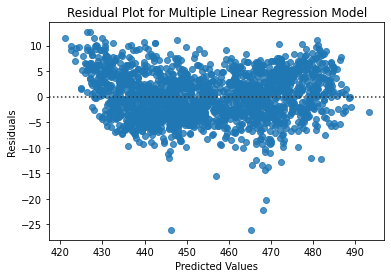

In [20]:
r2 = r2_score(y_test, y_pred)
print("R-squared score of the model ", r2)
print("\n")

# calculate the residuals
residuals = y_test - y_pred

# plot the residuals
sns.residplot(y_pred, residuals)
plt.title('Residual Plot for Multiple Linear Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
print("n")

# Poly - Step 1: Importing the libraries

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Poly - Step 2: Training on Poly Model

In [22]:
# create polynomial features
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)

# fit the model
regressor1= LinearRegression()
regressor1.fit(x_train_poly, y_train)

LinearRegression()

# Poly - Step 3: Predicting test results

In [23]:
# predict output for X
x_test_poly = poly.transform(x_test)
y_pred1 = regressor1.predict(x_test_poly)

# Poly - Step 4: Evaluating R-squared score

In [24]:
# calculate R-squared
r2 = r2_score(y_test, y_pred1)
print("R-squared score on test set is:", r2)

R-squared score on test set is: 0.9408305855211365


#SVR - Step 1: Importing the libraries

In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#SVR - Step 2: Training SVR model

In [26]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x_train)
x_test_scaled = sc_x.transform(x_test)

sc_y = StandardScaler()
y = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc_y.transform(y_test)

#SVR - Step 3: Feature scaling 

In [27]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x_train)
x_test_scaled = sc_x.transform(x_test)

sc_y = StandardScaler()
y = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc_y.transform(y_test)

#SVR - Step 4: Training the SVR model

In [28]:
model = SVR(kernel='rbf')
model.fit(x, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#SVR - Predicting on test set

In [29]:
x_new = model.predict(x_test_scaled)
y_pred = sc_y.inverse_transform(x_new.reshape(-1, 1))

#SVR- Step 4: Evaluating R-squared score

In [30]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score: ", r2)

R-squared Score:  0.9440653751925083
